## SciPy

SciPy is a collection of functions that perform common scientific operations, such as

* optimization
* root finding
* linear algebra
* interpolation
* numerical integration




Functionality is divided by subpackage

* `scipy.optimize`  holds optimization and root finding routines
* `scipy.integrate` holds numerical integration routines 

Let's start with standard imports:

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Statistics

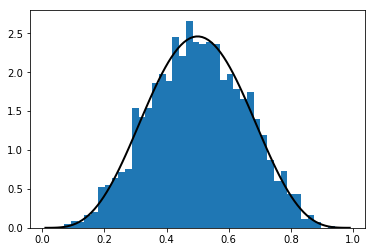

In [2]:
from scipy.stats import beta

q = beta(5, 5)          # Beta(a, b), with a = b = 5
obs = q.rvs(2000)       # 2000 observations
grid = np.linspace(0.01, 0.99, 100)

fig, ax = plt.subplots()
ax.hist(obs, bins=40, density=True)
ax.plot(grid, q.pdf(grid), 'k-', linewidth=2)
plt.show()

In [3]:
q.cdf(0.4)      # Cumulative distribution function

0.26656768000000003

In [4]:
q.pdf(0.4)      # Density function

2.0901888000000013

In [5]:
q.ppf(0.8)      # Quantile (inverse cdf) function

0.6339134834642708

In [6]:
q.mean()

0.5

## Optimization

* `scipy.optimize` provides various [optimization functions](https://docs.scipy.org/doc/scipy/reference/optimize.html#module-scipy.optimize)

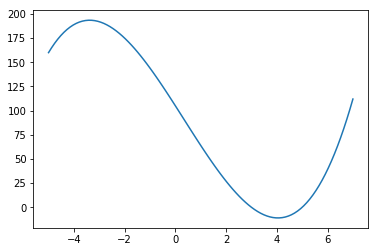

In [7]:
f = lambda x: (x-5)*(x-3)*(x+7)
x = np.linspace(-5, 7, 100)

plt.figure()
plt.plot(x, f(x))
plt.show()

In [8]:
from scipy.optimize import minimize

minimize(f, x0=0)

      fun: -11.022634220877407
 hess_inv: array([[0.04494094]])
      jac: array([1.31130219e-06])
  message: 'Optimization terminated successfully.'
     nfev: 27
      nit: 7
     njev: 9
   status: 0
  success: True
        x: array([4.0451763])

If we want to maximize, we need to define the negative of `f`

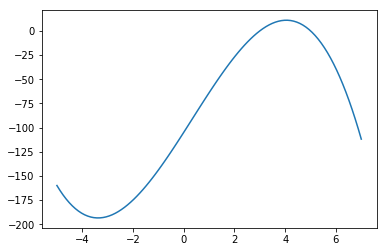

In [9]:
f = lambda x: -(x-5)*(x-3)*(x+7)

plt.figure()
plt.plot(x, f(x))
plt.show()

In [10]:
minimize(f, x0=0)

      fun: -193.54115273939595
 hess_inv: array([[0.04491171]])
      jac: array([0.])
  message: 'Optimization terminated successfully.'
     nfev: 21
      nit: 6
     njev: 7
   status: 0
  success: True
        x: array([-3.37850956])

### Multivariate optimization

Let's say we have a funtion of two or more variables
* Optimization with scipy becomes a bit more complicated - mostly due to syntax

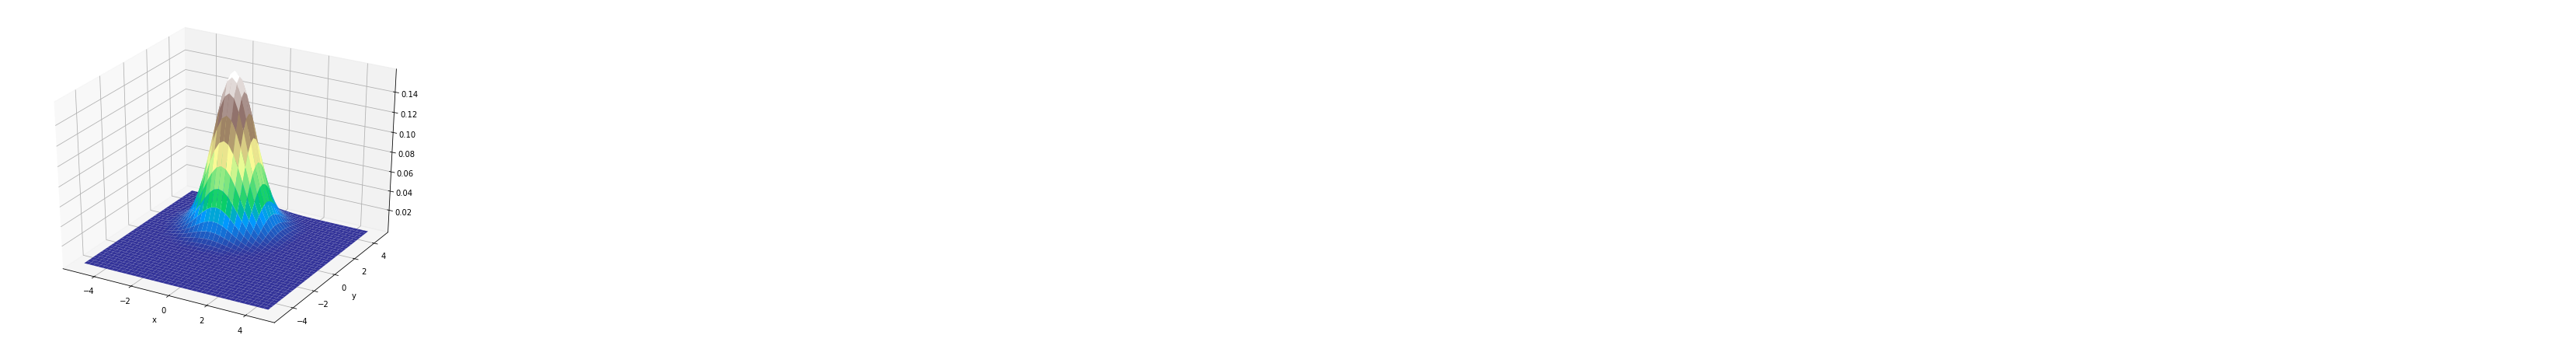

In [11]:
from scipy.stats import norm
from mpl_toolkits.mplot3d import Axes3D

def g(params):
    x, y = params
    return  norm.pdf(x, loc=2) * norm.pdf(y, loc=-1)

fig = plt.figure(figsize=(10, 8))
ax = fig.gca(projection='3d')

x = np.arange(-5, 5, 0.25)
y = np.arange(-5, 5, 0.25)
x, y = np.meshgrid(x, y)

z = g([x, y])

ax.plot_surface(x, y, z.T, cmap='terrain')
ax.set(xlabel='x', ylabel='y')
plt.show()

In [12]:
# Always return the negative when maximizing!!

def g(params):
    x, y = params
    return -norm.pdf(x, loc=2) * norm.pdf(y, loc=-1)

In [13]:
minimize(g, x0=[0, 0])

      fun: -0.1591549430915366
 hess_inv: array([[ 60.15500183, -29.57750053],
       [-29.57750053,  15.78875007]])
      jac: array([ 3.03611159e-07, -1.49011612e-07])
  message: 'Optimization terminated successfully.'
     nfev: 36
      nit: 2
     njev: 9
   status: 0
  success: True
        x: array([ 2.00000191, -1.00000094])

### Constrained optimization

If we want to keep y fixed, we need to redefine `g`
* Unconstrained parameters come first, and must be either scalar or a tuple/list
* Fixed parameters follow

In [14]:
def g(x, y):
    return -norm.pdf(x, loc=2) * norm.pdf(y, loc=-1)

In [15]:
minimize(g, x0=0, args=(-3))

      fun: -0.021539279299034302
 hess_inv: array([[356.75373706]])
      jac: array([-3.48314643e-07])
  message: 'Optimization terminated successfully.'
     nfev: 24
      nit: 2
     njev: 8
   status: 0
  success: True
        x: array([1.99998383])

# SymPy

**SymPy** is a library that allows you to do symbolic math in Python

That is, we can solve equations algebraically and find exact solutions

Let's start by creating a 'symbol', this acts like a mathematical variable

In [16]:
from sympy import *
init_printing()  # Set up pretty printing

x = symbols('x')
x**2 - 2 * x + 2

In [17]:
p = symbols('rho')
p

We can use SymPy to do calculus

In [18]:
# Differentiate

diff(x**2 - 2 * x + 2, x)

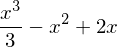

In [19]:
# Compute the indefinite integral

integrate(x**2 - 2 * x + 2, x)

In [20]:
# Compute the definite integral

integrate(x**2 - 2 * x + 2, (x, 0, 12))

In [21]:
# Limit as x goes to infinity

limit(1 / x, x, oo)

We can also use SymPy to solve equations algebraically

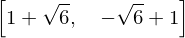

In [23]:
solve(x**2 - 2 * x - 5, x)

For more SymPy features, see here: https://www.sympy.org/en/index.html

## Homework

**Exercise 1**

Consider again a simple linear regression model


$$
y = X \beta + \varepsilon \quad \quad \varepsilon \sim N(0, 1)
$$

Instead of OLS, we can use Maximum Likelihood Estimation to estimate $\beta$

We can write the distribution of $y$ as

$$
f(y) = \frac{1}{\sqrt{2 \pi \sigma^2}} e^{- \frac{1}{2 \sigma^2}(y - X \beta)^2}
$$

This implies the log-likelihood is

$$
\log \mathcal{L} = - \frac{T}{2} \log 2 \pi \sigma^2 - \frac{1}{2 \sigma^2}
\sum_{t=1}^{T} (y_t - \beta x_t)^2 \quad \quad \text{where } \sigma^2 = 1
$$

Given

In [22]:
y = np.array([3, 7, 10, 5])
X = np.array([[5, 3], 
              [2, 3], 
              [3, 1], 
              [2, 8]])

Estimate $\beta$ using maximum likelihood estimation

Hints: 
* $y_t - X \beta$ is the sum of squared errors
* Write a function `logL` that returns the *negative* of the log-likelihood function
* `x0` should be a (2 x 1) vector (this is an initial guess for $\beta$)
* Use scipy's `minimize` function to maximize $log \mathcal{L}$ with respect to $\beta$ given $y$ and $X$

### References:

Full docs are here: https://docs.scipy.org/doc/scipy/reference/index.html

QuantEcon SciPy tutorial: https://lectures.quantecon.org/py/scipy.html